In [1]:
! pip install pytrends

  Created wheel for pytrends: filename=pytrends-4.8.0-py3-none-any.whl size=16124 sha256=08db563e49d5e20a3bb4a08149828b5d8ba228f3cc5c9060d1b3cb51f2381f16
  Stored in directory: c:\users\mmart\appdata\local\pip\cache\wheels\87\a9\a3\c190a7e0872639762e92cf3a84d6845ed086e10966533faf42
Successfully built pytrends


In [1]:
import pandas as pd
import time # para evaluar el tiempo necesario para obtener los datos

# Creación del objeto de consulta de Google Trends
from pytrends.request import TrendReq
pytrends = TrendReq()

### Estadísticias que se pueden obtener
1. 

La *payload* es donde se almacenan los parámetros de la consulta a enviar al servidor de Google Trends. Hay **5** parámetros que pueden incluirse en la payload (los mismos que se pueden utilizar directamente en la web de Google Trends).

    kw_list (list of keywords we want to analyze)
    cat (category)
    timeframe
    geo (region or location of the data)
    gprop (Google’s property)

In [3]:
# Configuración de la payload
# Solo se necesita para interest_over_time(), interest_by_region() y related_queries()

kw_list = ['Samsung']

# cat = '1071' # Smartphones
cat = ''

timeframes = [
    'today 5-y',
    'today 12-m',
    'today 3-m',
    'today 1-m'
    ]

geo = '' #worldwide

gprop = '' #websearch

In [55]:
 # 

In [65]:
# pytrends.build_payload(kw_list, cat=cat, timeframe=timeframes[0], geo='', gprop='')

<AxesSubplot:xlabel='geoName'>

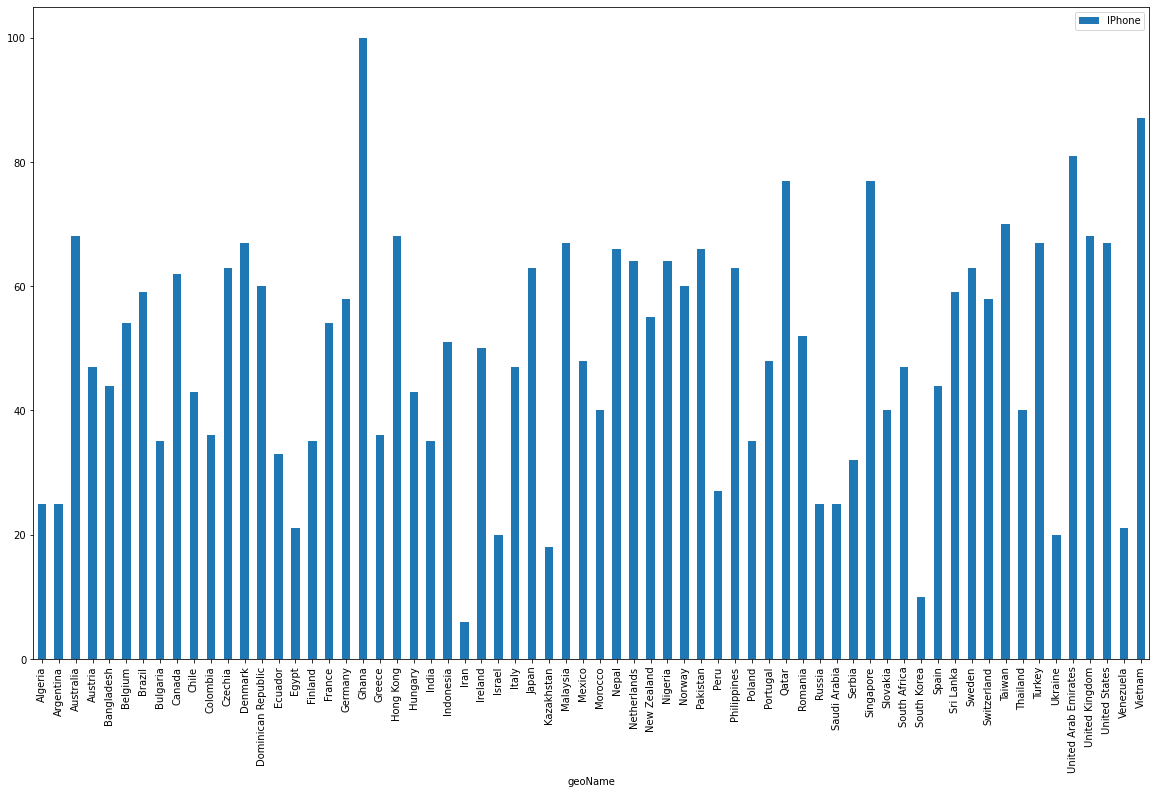

In [57]:
# Interest by Region
region_df = pytrends.interest_by_region()

#looking at rows where all values are not equal to 0
region_df = region_df[(region_df != 0).all(1)]

#drop all rows that have null values in all columns
region_df.dropna(how='all',axis=0, inplace=True)

#visualise
region_df.plot(figsize=(20, 12), y=kw_list, kind ='bar')

In [58]:
# Interest by Region
region_df = pytrends.interest_by_region()
region_df[region_df.index == 'Germany']

,IPhone
geoName,
Germany,58


In [59]:
data = pytrends.interest_over_time()

In [60]:
data

,IPhone,isPartial
date,,
2017-08-20,49,False
2017-08-27,48,False
2017-09-03,50,False
2017-09-10,100,False
2017-09-17,67,False
...,...,...
2022-07-17,46,False
2022-07-24,45,False
2022-07-31,46,False


In [36]:
# Cálculo de la media
mean = round(data.mean(),2)
mean

iPhone       6.33
isPartial    0.00
dtype: float64

In [ ]:
# Esta celda es para procesar múltiples keywords secuencialmente

keywords = []

def check_trends():
    pytrends.build_payload(
        kw_list,
        cat,
        timeframes[0],
        geo,
        gprop
        )

    data = pytrends.interest_over_time()

for keyword in kw_list:
    keywords.append(keyword)
    check_trends()
    keywords.pop()

In [70]:
pytrends.build_payload(kw_list=['pizza', 'bagel'])

# Interest Over Time
interest_over_time_df = pytrends.interest_over_time()
print(interest_over_time_df.head())

            pizza  bagel  isPartial
date                               
2017-08-27     82      1      False
2017-09-03     81      1      False
2017-09-10     78      1      False
2017-09-17     73      1      False
2017-09-24     76      1      False


In [83]:
# Interest by Region
interest_by_region_df = pytrends.interest_by_region()

In [86]:
interest_by_region_df.loc['Germany', :]

pizza    100
bagel      0
Name: Germany, dtype: int32

In [7]:
# Related Queries, returns a dictionary of dataframes
pytrends.build_payload(kw_list=['IPhone', 'Mobile Phone'])
related_queries_dict = pytrends.related_queries()
print(related_queries_dict)

{'Samsung': {'top':                query  value
0     samsung galaxy    100
1         samsung tv     37
2      samsung phone     21
3         samsung s8     18
4         samsung j7     18
5        samsung s10     15
6             iphone     15
7         samsung s9     15
8     samsung mobile     14
9         samsung s7     13
10       samsung tab     13
11       samsung s20     13
12    tablet samsung     12
13            tablet     11
14       a50 samsung     10
15     samsung watch     10
16  samsung smart tv     10
17        hp samsung      9
18       s21 samsung      9
19   celular samsung      9
20     samsung india      9
21        samsung j5      8
22        samsung s6      8
23       a51 samsung      8
24            huawei      8, 'rising':                  query  value
0          s21 samsung  95600
1          samsung s20  65850
2         samsung a21s  57750
3          samsung a32  56250
4     samsung s10 plus  49600
5          a51 samsung  48950
6          samsung m31  46700
7

In [95]:
related_queries_dict['pizza']['top']['query']

0                  pizza hut
1              pizza near me
2                    dominos
3              dominos pizza
4             pizza delivery
5                 best pizza
6          pizza hut near me
7                pizza dough
8               pizza recipe
9               pizza online
10                  pizzeria
11                pizza oven
12             pizza express
13               pizza house
14                papa johns
15               crust pizza
16          papa johns pizza
17                pizza city
18            little caesars
19      little caesars pizza
20            menu pizza hut
21    pizza near me delivery
22          delivery near me
23              pizza domino
24    pizza delivery near me
Name: query, dtype: object

In [97]:
# Get Google Hot Trends data
trending_searches_df = pytrends.trending_searches()
print(trending_searches_df.head())

                         0
0  Leeds United vs Chelsea
1            Albert Pujols
2     West Ham vs Brighton
3                  UFC 278
4           Oleksandr Usyk


In [99]:
# Get Google Hot Trends data
today_searches_df = pytrends.today_searches()
print(today_searches_df.head(15))

0    /trends/explore?q=Leeds+United+vs+Chelsea&date...
1    /trends/explore?q=Albert+Pujols&date=now+7-d&g...
2    /trends/explore?q=West+Ham+vs+Brighton&date=no...
3    /trends/explore?q=Daria+Dugina&date=now+7-d&ge...
Name: exploreLink, dtype: object


In [101]:
# Get Google Top Charts
top_charts_df = pytrends.top_charts(2018, hl='en-US', tz=300, geo='GLOBAL')
print(top_charts_df.head(15))

              title exploreQuery
0         World Cup             
1            Avicii             
2        Mac Miller             
3          Stan Lee             
4     Black Panther             
5     Meghan Markle             
6  Anthony Bourdain             
7      XXXTentacion             
8   Stephen Hawking             
9        Kate Spade             


In [6]:
# Get Google Keyword Suggestions (es el Autocomplete del cajetín de búsqueda)
suggestions_dict = pytrends.suggestions(keyword='Samsung')
print(suggestions_dict)

[{'mid': '/m/04zjj11', 'title': 'Samsung', 'type': 'Topic'}, {'mid': '/m/01nn79', 'title': 'Samsung Electronics', 'type': 'Electronics company'}, {'mid': '/g/11n1093hj1', 'title': 'Samsung Galaxy A12', 'type': 'Mobile phone'}, {'mid': '/g/11qpyb3y70', 'title': 'Samsung Galaxy S21', 'type': 'Mobile phone'}, {'mid': '/g/11r3_75bd9', 'title': 'Samsung Galaxy A52', 'type': 'Mobile phone'}]


*title* es el término de búsqueda, *type* es el tipo de búsqueda y *mid* es la cadena de búsqueda correspondiente, que se puede utilizar como *keyword*, p. ej. en la búsqueda **Interest over time**.

In [103]:
# Get Google Realtime Search Trends

realtime_searches = pytrends.realtime_trending_searches(pn='IN')
print(realtime_searches.head())

                                               title  \
0  Manchester City F.C., Newcastle United F.C., P...   
1  FC Bayern Munich, VfL Bochum 1848, Bundesliga,...   
2  Leeds United, Chelsea F.C., Premier League, Th...   
3          Atlético de Madrid, Villarreal CF, LaLiga   
4  Shiv Sena, Aaditya Thackeray, Eknath Shinde, T...   

                                         entityNames  
0  [Manchester City F.C., Newcastle United F.C., ...  
1  [FC Bayern Munich, VfL Bochum 1848, Bundesliga...  
2  [Leeds United, Chelsea F.C., Premier League, T...  
3        [Atlético de Madrid, Villarreal CF, LaLiga]  
4  [Shiv Sena, Aaditya Thackeray, Eknath Shinde, ...  


In [104]:
lista_palabras = ["pfizer"]

pytrends.build_payload(lista_palabras, cat=0, timeframe="today 12-m", geo="ES")

pytrends.interest_over_time()

,pfizer,isPartial
date,,
2021-08-22,100,False
2021-08-29,77,False
2021-09-05,55,False
2021-09-12,43,False
2021-09-19,35,False
2021-09-26,28,False
2021-10-03,29,False
2021-10-10,23,False
2021-10-17,24,False


In [ ]:
kw_list = ['Hiper', 'Mobile Phone']

pytrends.build_payload(kw_list)

startTime = time.time()
data = pytrends.get_historical_interest(kw_list,
                                       year_start=2019,
                                       month_start=4,
                                       day_start=1,
                                       hour_start=0,

                                       year_end=2020,
                                       month_end=10,
                                       day_end=31,
                                       hour_end=23,

                                       sleep=60)  # Delay added for rate limit

executionTime = (time.time() - startTime)
print('Execution time in seconds: ' + str(executionTime))

print(data)

In [16]:
data.to_csv('GT_hist_Goodloot_04_2019_10_2020.csv')